# IMPORTING NECESSARY LIBRARIES

In [1]:
!pip install opendatasets
!pip install pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

# 2.) Loading the data

In [3]:
import opendatasets as od
import pandas
od.download ( "https://www.kaggle.com/datasets/camnugent/california-housing-prices")

Skipping, found downloaded files in ".\california-housing-prices" (use force=True to force download)


In [4]:
import os
print("Current Working Directory:", os.getcwd())



Current Working Directory: C:\Users\pooji


In [5]:
file = os.path.join(os.getcwd(), "california-housing-prices", "housing.csv")


In [6]:
import pandas as pd

df = pd.read_csv(file)  # Correct function for CSV files
# Display the content
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
import pandas as pd
#Correct file path (ensure the extracted folder name matches this)
file = r'C:\Users\pooji\california-housing-prices/housing.csv'

df = pd.read_csv(file)  # Correct function for CSV files

# Display the content
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
df.tail(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


# 2,)Sanity check of data

In [9]:
df.shape

(20640, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
df.isna().sum() #finding the empty/null values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [12]:
#finding the percent of missing value (if >50 need to delete the column)
df.isna().sum() /df.shape[0]*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [13]:
df.duplicated().sum()

0

In [14]:
from sklearn.impute import SimpleImputer

# Median Imputation for 'total_bedrooms'
imputer = SimpleImputer(strategy='median')
df['total_bedrooms'] = imputer.fit_transform(df[['total_bedrooms']])


In [15]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [16]:
#finding the unique values(garbage value in object data types)
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


# 3.) Exploratory Data Analysis

In [17]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [18]:
df.describe(include="object")

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


<Axes: xlabel='ocean_proximity', ylabel='count'>

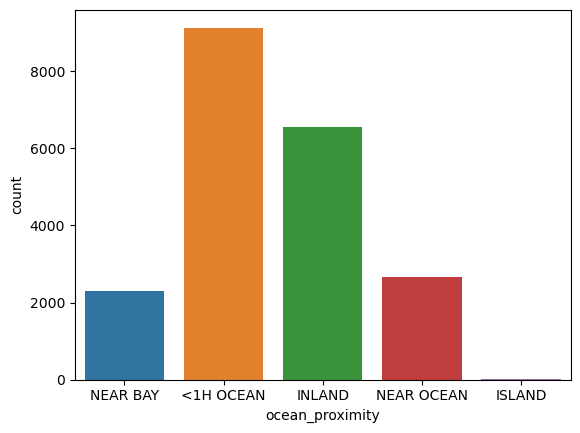

In [19]:
sns.countplot(x="ocean_proximity",data=df)

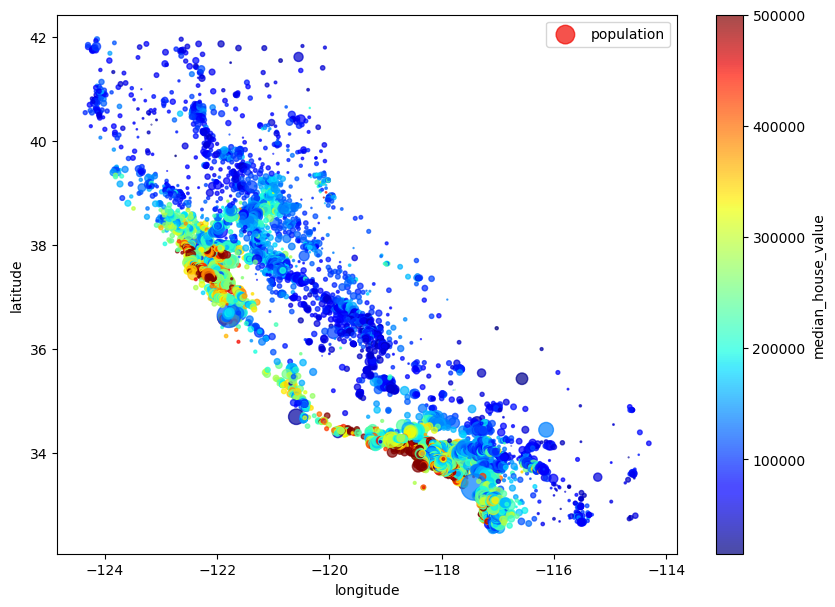

In [20]:
df.plot(kind="scatter", x="longitude",y="latitude", c="median_house_value", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10,7), s=df['population']/100, label="population", alpha=0.7)
plt.show()

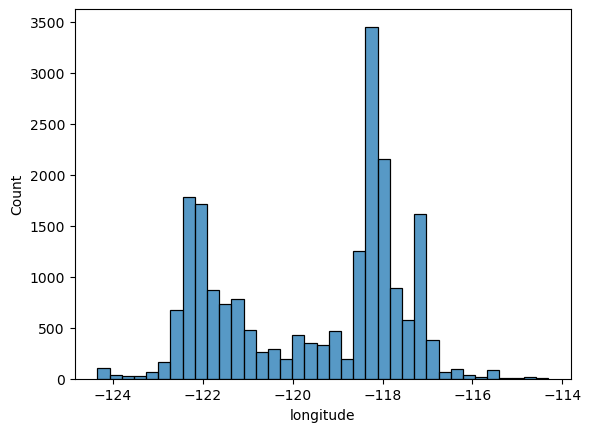

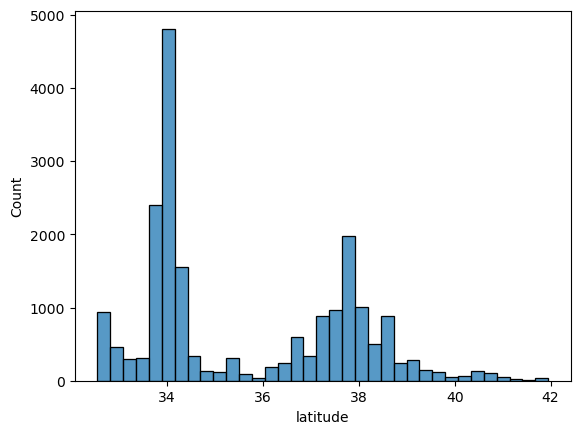

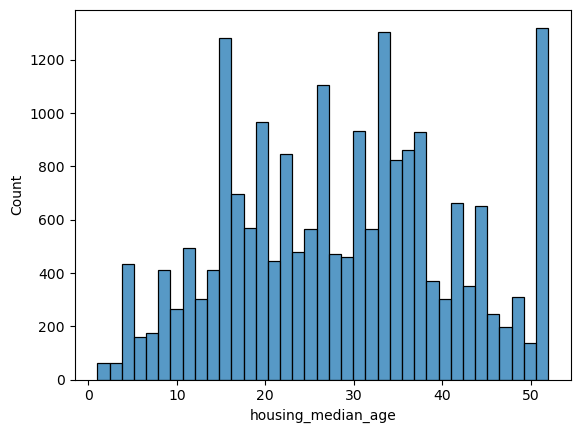

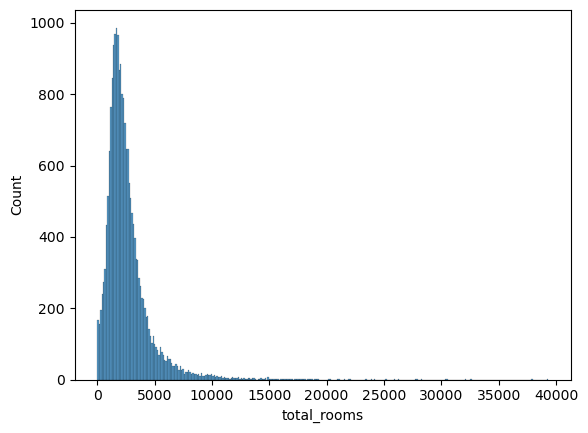

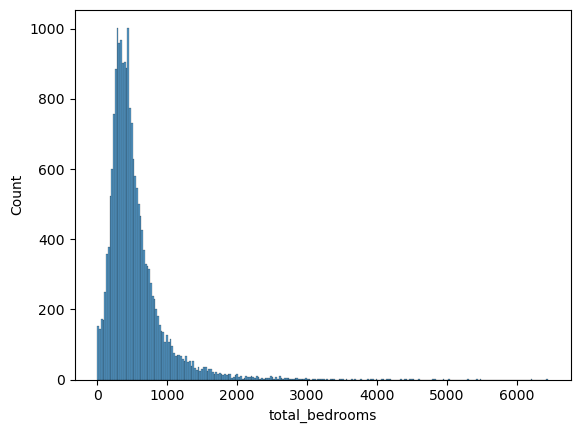

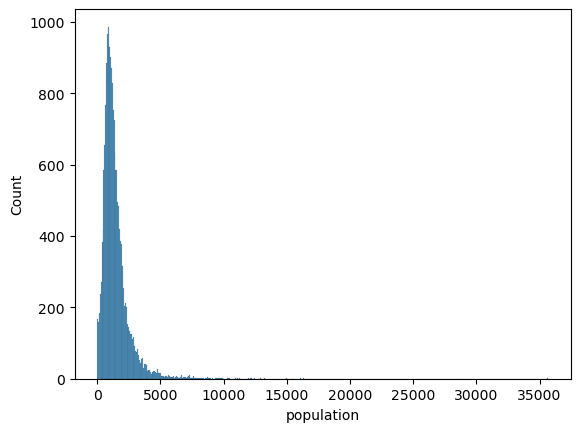

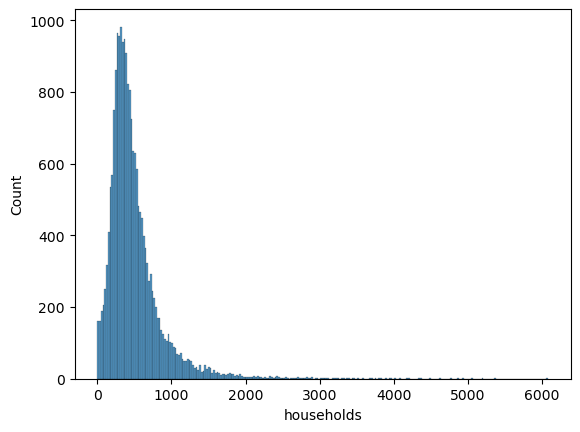

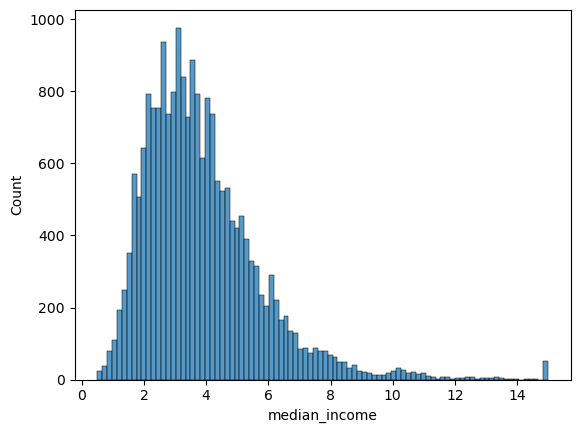

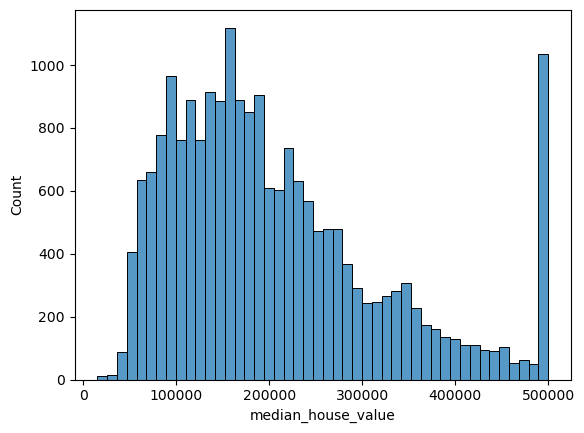

In [21]:
# Distribution plots for key numerical features
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

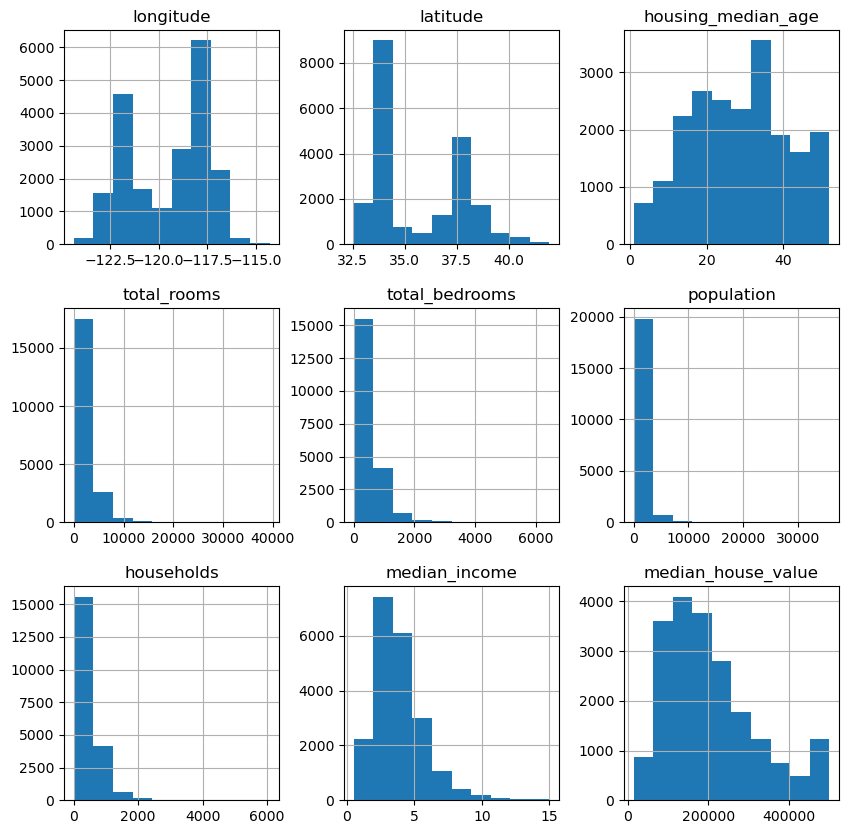

In [22]:
#histogram to understand numerical data distribution
df.hist(bins=10,figsize=(10,10))
plt.show()

#Skewed Data (Right Skewed / Positive Skew)
*total_rooms – Strong right skew
*total_bedrooms – Strong right skew
*population – Strong right skew
*households – Strong right skew
*median_income – Mild right skew
#Less or Not Skewed Data
*longitude – Bimodal distribution, not heavily skewed
*latitude – Bimodal distribution, not heavily skewed
*housing_median_age – Fairly uniform distribution
*median_house_value – Slight right skew but not extreme

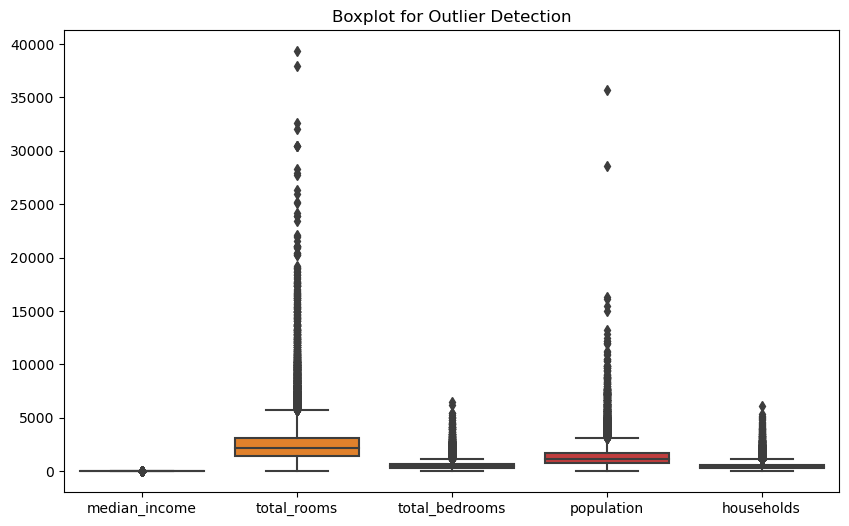

In [23]:
#box plot to identify the outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['median_income', 'total_rooms', 'total_bedrooms', 'population','households']])
plt.title('Boxplot for Outlier Detection')
plt.show()


In [24]:
# Removing outliers beyond the 99th percentile
for col in ['total_rooms', 'total_bedrooms', 'population', 'households']:
    upper_limit = df[col].quantile(0.95)
    lower_limit = df[col].quantile(0.01)
    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]


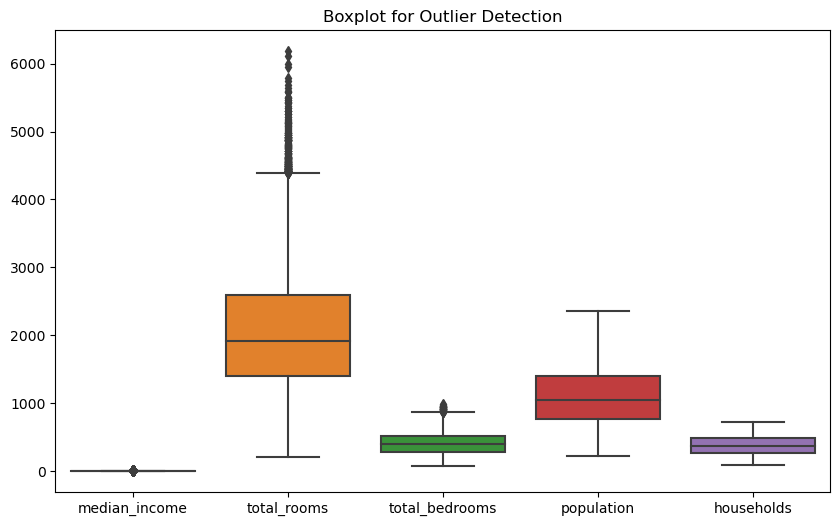

In [25]:
#box plot to identify the outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['median_income', 'total_rooms', 'total_bedrooms', 'population','households']])
plt.title('Boxplot for Outlier Detection')
plt.show()

In [26]:
from scipy.stats import mstats

# Winsorize total_rooms and total_bedrooms at 95th percentile
df['total_rooms'] = mstats.winsorize(df['total_rooms'], limits=[0, 0.05])
df['total_bedrooms'] = mstats.winsorize(df['total_bedrooms'], limits=[0, 0.05])



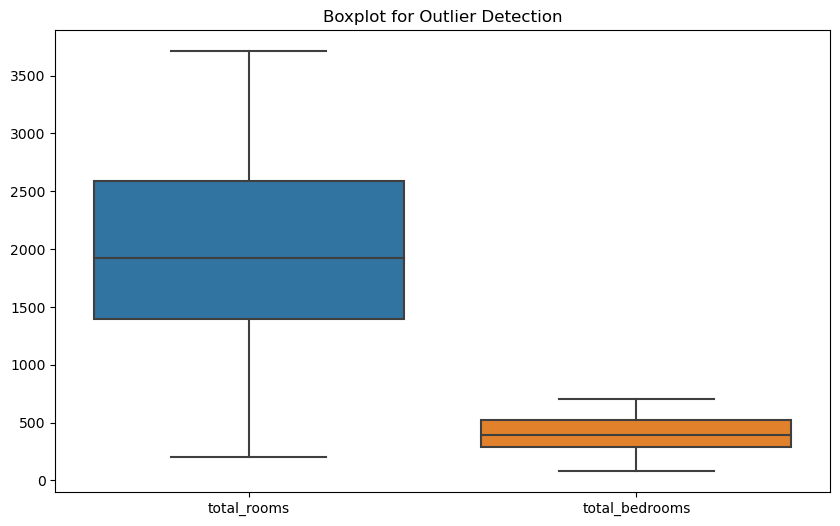

In [27]:
#box plot to identify the outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['total_rooms', 'total_bedrooms']])
plt.title('Boxplot for Outlier Detection')
plt.show()

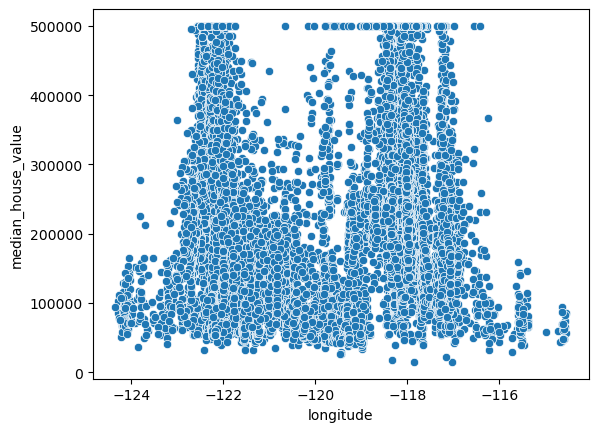

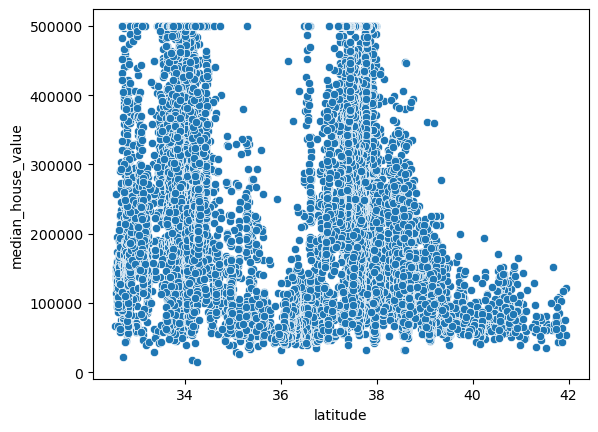

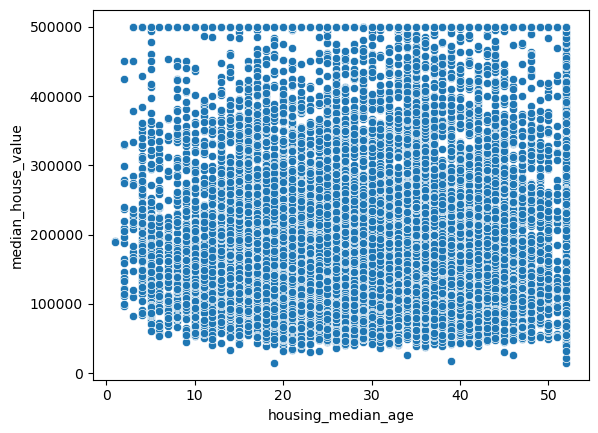

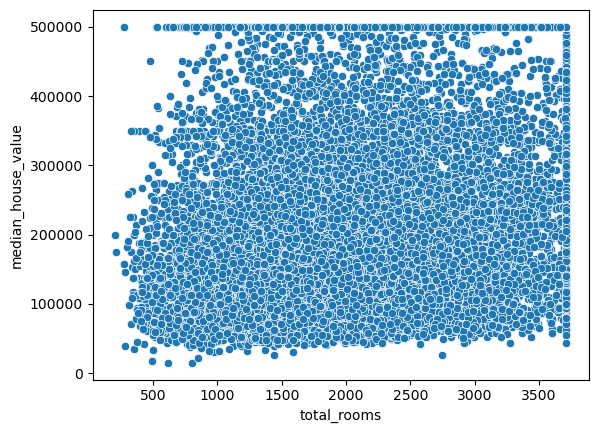

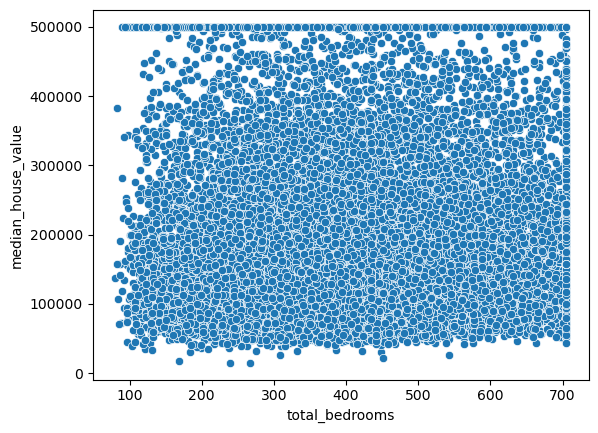

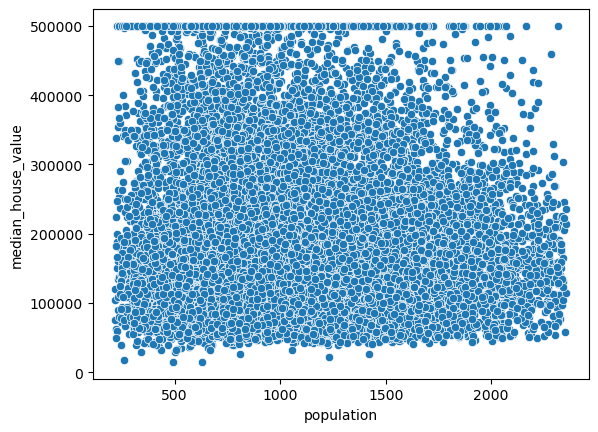

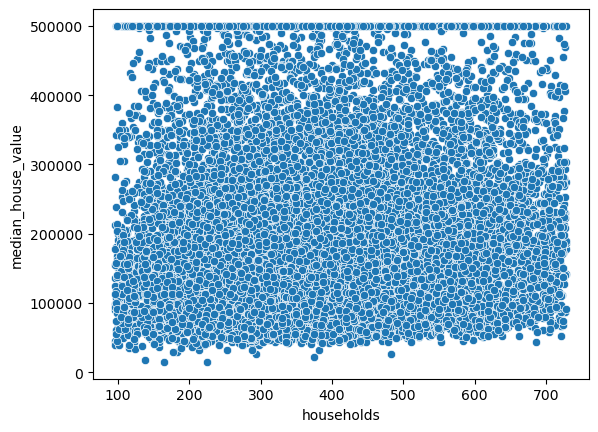

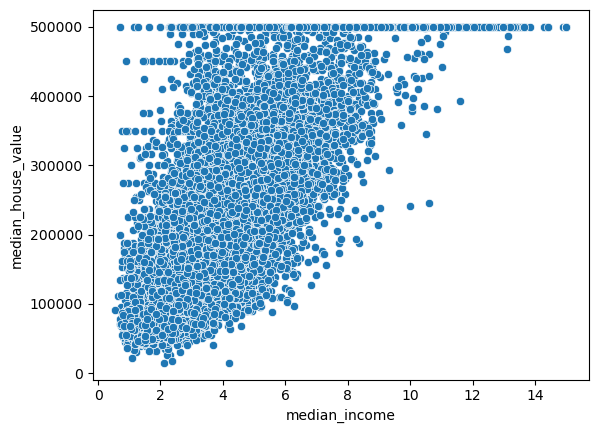

In [28]:
#scatter plot to understand relationship
for i in ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']:
    sns.scatterplot(data=df,x=i,y="median_house_value")
    plt.show()

In [29]:
df.select_dtypes(include="number").columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [30]:
df.select_dtypes(include="number").corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924821,-0.090947,-0.022231,0.021563,0.116083,0.020602,0.002774,-0.029512
latitude,-0.924821,1.000000,-0.011070,0.026711,-0.020915,-0.130437,-0.046714,-0.100482,-0.161122
housing_median_age,-0.090947,-0.011070,1.000000,-0.255599,-0.182706,-0.168417,-0.154493,-0.109129,0.121281
total_rooms,-0.022231,0.026711,-0.255599,1.000000,0.841802,0.688730,0.840280,0.317536,0.223562
total_bedrooms,0.021563,-0.020915,-0.182706,0.841802,1.000000,0.763291,0.953478,-0.061442,0.037429
population,0.116083,-0.130437,-0.168417,0.688730,0.763291,1.000000,0.819191,-0.040665,-0.092985
households,0.020602,-0.046714,-0.154493,0.840280,0.953478,0.819191,1.000000,-0.014851,0.066369
median_income,0.002774,-0.100482,-0.109129,0.317536,-0.061442,-0.040665,-0.014851,1.000000,0.716555
median_house_value,-0.029512,-0.161122,0.121281,0.223562,0.037429,-0.092985,0.066369,0.716555,1.000000


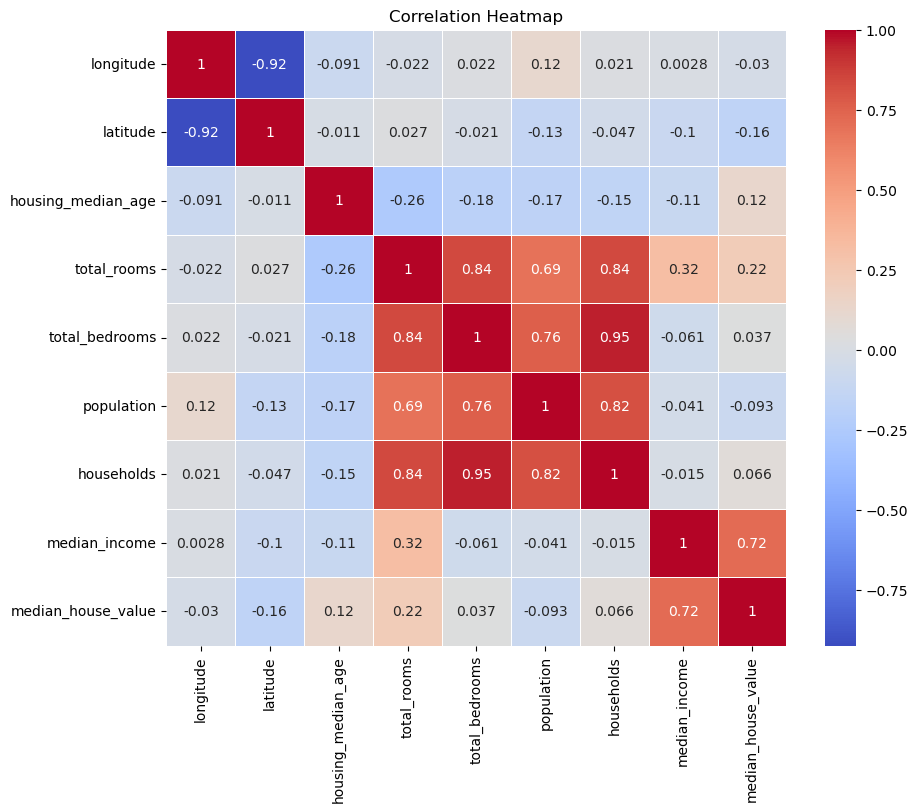

In [31]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include="number").corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


From the correlation heatmap, we can observe that:

High Correlation Pairs:
total_rooms and total_bedrooms (0.84)
total_bedrooms and households (0.95)
population and households (0.82)

# 4.)Feature Selection

train_df["rooms_per_household"] = train_df["total_rooms"]/train_df["households"]
train_df["bedrooms_per_room"] = train_df["total_bedrooms"]/train_df["total_rooms"]
train_df["population_per_household"] = train_df["population"]/train_df["households"]


test_df["rooms_per_household"] = test_df["total_rooms"]/test_df["households"]
test_df["bedrooms_per_room"] = test_df["total_bedrooms"]/test_df["total_rooms"]
test_df["population_per_household"] = test_df["population"]/test_df["households"]

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Assuming your feature data is in a DataFrame called 'X'
X = df[['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]

# Add a constant for the intercept term
X['constant'] = 1  

# Calculate VIF for each feature
vif = pd.DataFrame({
    "Feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

print(vif)


          Feature        VIF
0     total_rooms   6.763422
1  total_bedrooms  14.272391
2      population   3.117568
3      households  14.679503
4   median_income   1.919830
5        constant  15.757002


In [33]:
# Creating derived features
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_house'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
df['location_cluster'] = kmeans.fit_predict(df[['longitude', 'latitude']])



<Axes: xlabel='location_cluster', ylabel='count'>

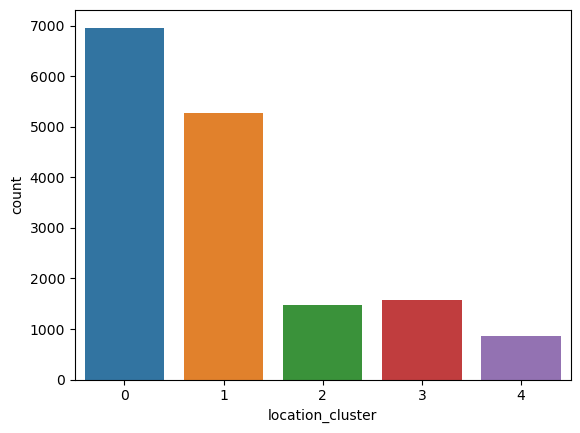

In [36]:
sns.countplot(x="location_cluster",data=df)

In [37]:
# Dropping the original features
df.drop(['total_rooms', 'total_bedrooms', 'households','latitude','longitude'], axis=1, inplace=True)


In [38]:
# Recalculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[ ['population', 'median_income', 'rooms_per_household', 'bedrooms_per_house', 'population_per_household']]
# Add a constant for the intercept term
X['constant'] = 1  

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                    Feature         VIF
0                population    1.191901
1             median_income    1.655358
2       rooms_per_household    1.853110
3        bedrooms_per_house    2.010051
4  population_per_household    1.156984
5                  constant  116.712295


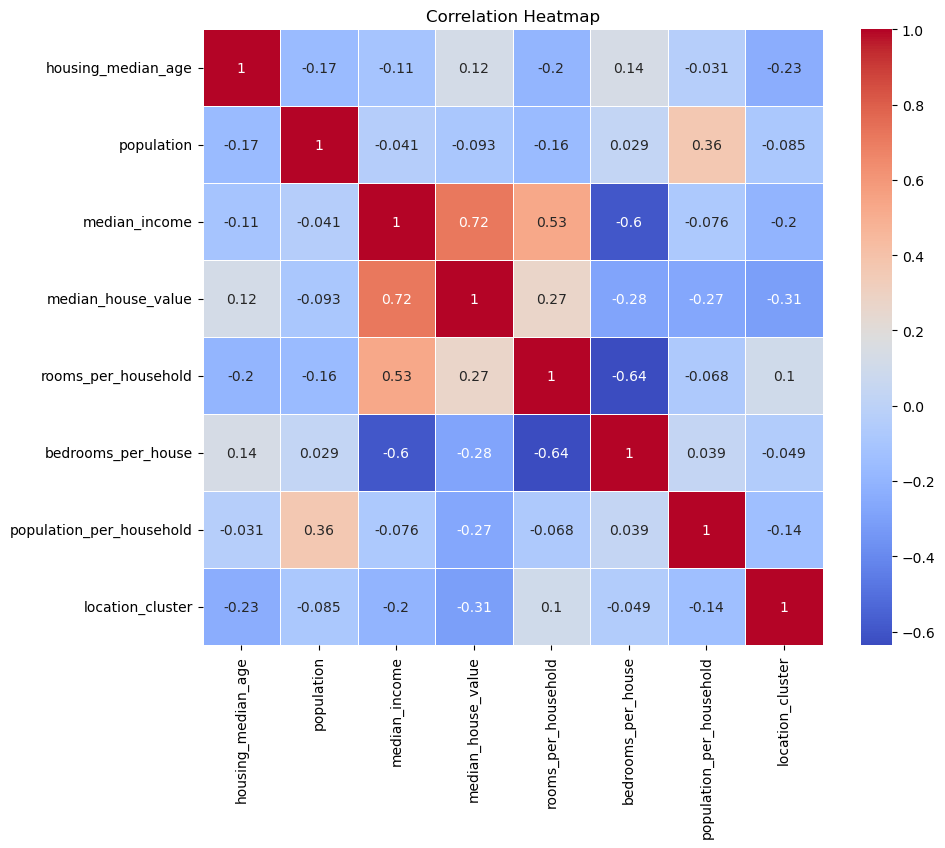

In [39]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include="number").corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

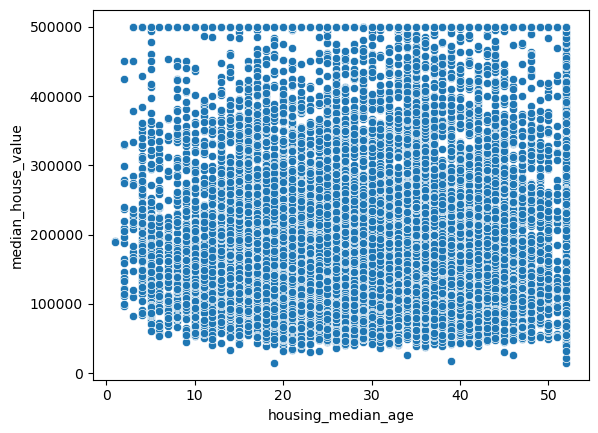

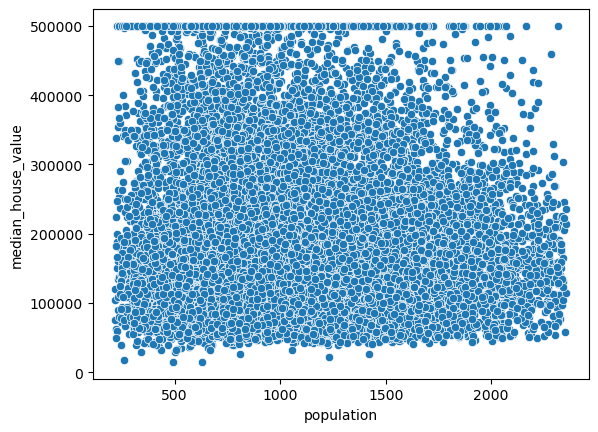

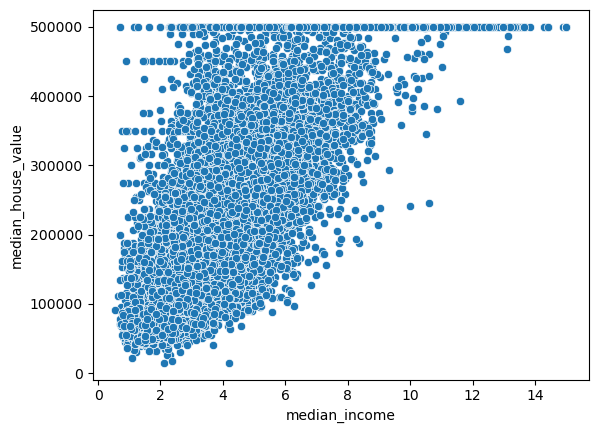

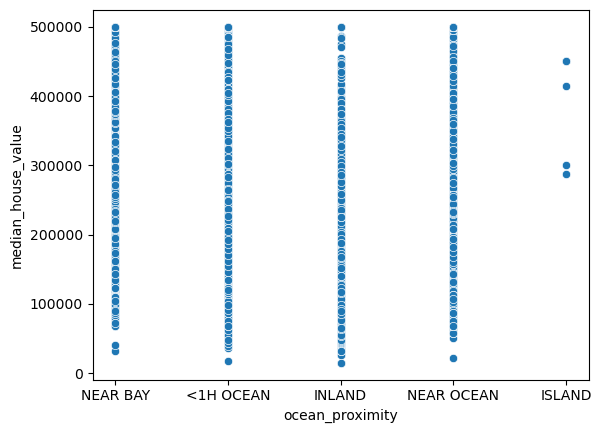

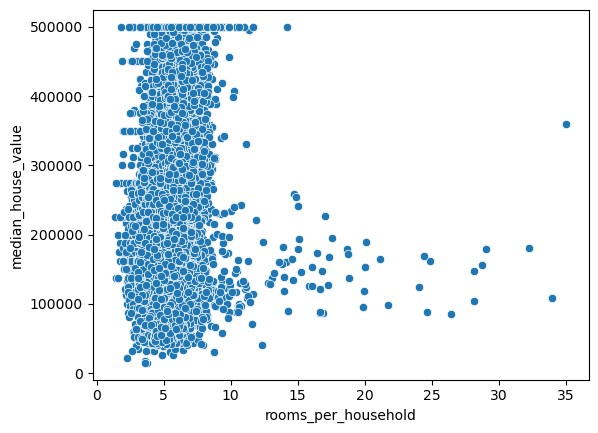

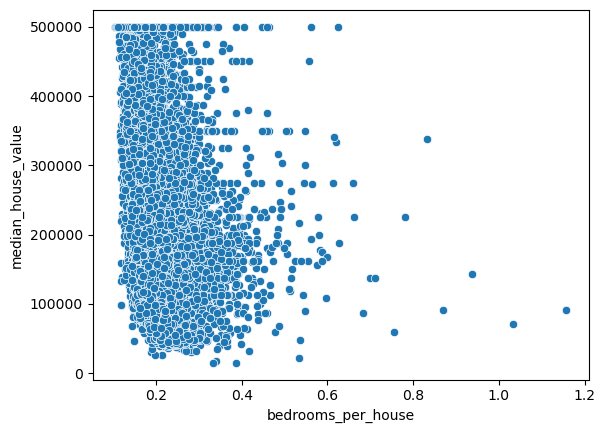

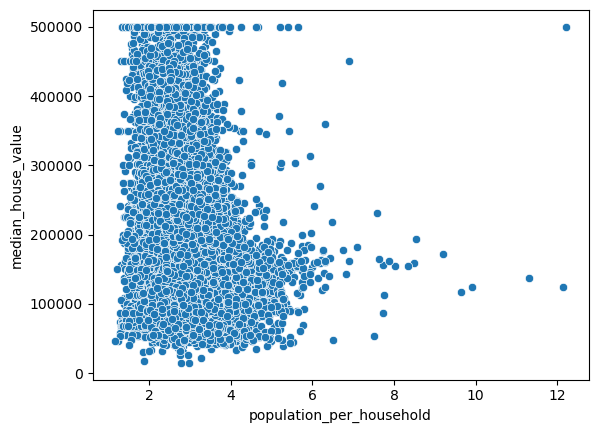

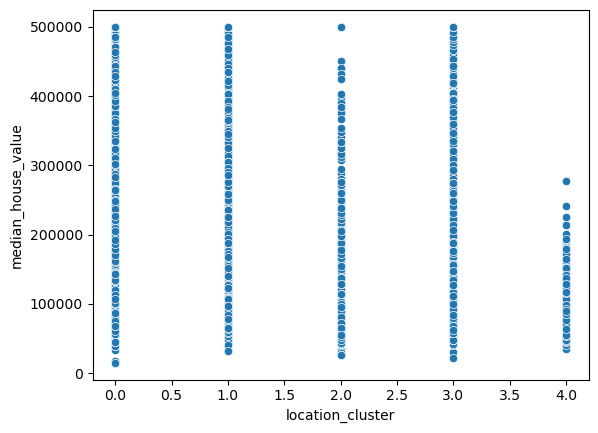

In [40]:
#scatter plot to understand relationship
for i in ['housing_median_age','population','median_income','ocean_proximity','rooms_per_household','bedrooms_per_house','population_per_household','location_cluster']:
    sns.scatterplot(data=df,x=i,y="median_house_value")
    plt.show()

# ENCODING CATEGORICAL VALUES

In [41]:
labelEncoder = LabelEncoder()
print(df["ocean_proximity"].value_counts())
df["ocean_proximity"] = labelEncoder.fit_transform(df["ocean_proximity"])
df["ocean_proximity"].value_counts()
df.describe()

ocean_proximity
<1H OCEAN     7155
INLAND        5033
NEAR OCEAN    2103
NEAR BAY      1840
ISLAND           5
Name: count, dtype: int64


,housing_median_age,population,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_house,population_per_household,location_cluster
count,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000
mean,30.289601,1103.493865,3.896717,205681.220191,1.175942,5.352963,0.210111,2.923146,1.013510
std,12.222982,454.561296,1.915094,116378.523716,1.428982,1.453586,0.055292,0.727788,1.178231
min,1.000000,218.000000,0.549500,14999.000000,0.000000,1.378486,0.104712,1.169329,0.000000
25%,20.000000,761.000000,2.563850,116700.000000,0.000000,4.520135,0.175816,2.455161,0.000000
50%,31.000000,1051.000000,3.560450,178300.000000,1.000000,5.261539,0.200162,2.829346,1.000000
75%,39.000000,1407.000000,4.793500,263800.000000,1.000000,5.987097,0.234297,3.272650,1.000000
max,52.000000,2355.000000,15.000100,500001.000000,4.000000,35.018868,1.156915,12.212766,4.000000


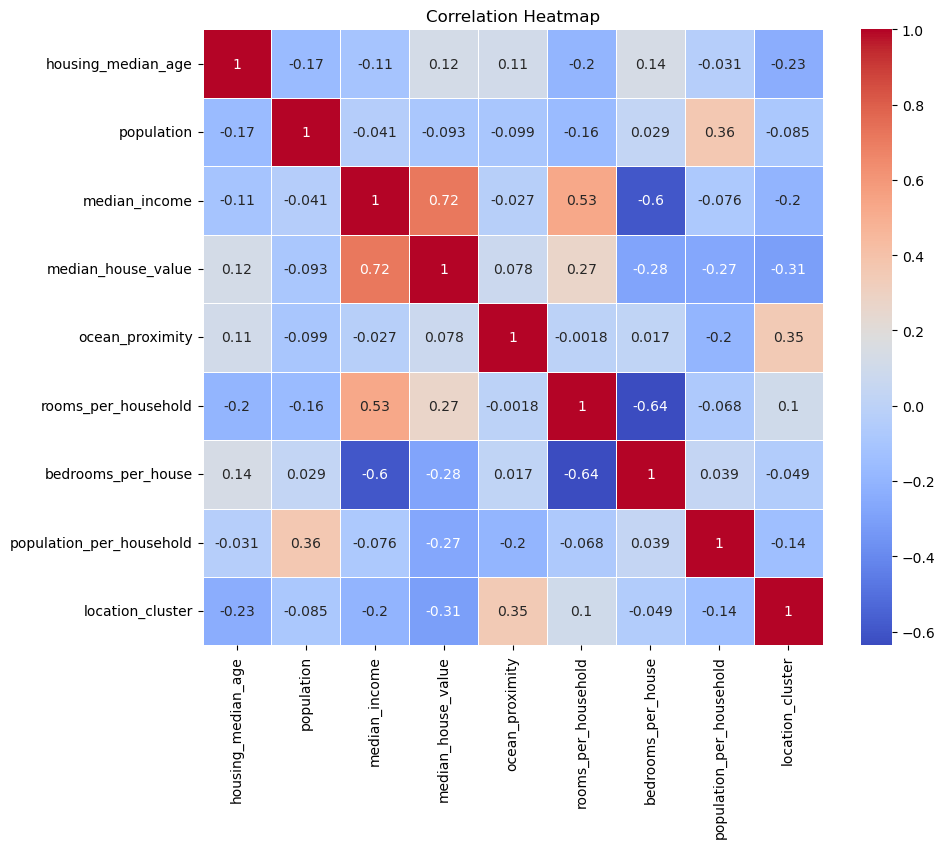

In [42]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include="number").corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [43]:
df.head()

,housing_median_age,population,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_house,population_per_household,location_cluster
0,41.0,322.0,8.3252,452600.0,3,6.984127,0.146591,2.555556,1
2,52.0,496.0,7.2574,352100.0,3,8.288136,0.129516,2.802260,1
3,52.0,558.0,5.6431,341300.0,3,5.817352,0.184458,2.547945,1
4,52.0,565.0,3.8462,342200.0,3,6.281853,0.172096,2.181467,1
5,52.0,413.0,4.0368,269700.0,3,4.761658,0.231774,2.139896,1


In [44]:
df.dtypes

housing_median_age          float64
population                  float64
median_income               float64
median_house_value          float64
ocean_proximity               int32
rooms_per_household         float64
bedrooms_per_house          float64
population_per_household    float64
location_cluster              int32
dtype: object

In [45]:
#Splitting the data for testing and training 

In [46]:
from sklearn.model_selection import train_test_split

X = df.drop('median_house_value', axis=1)  # Features
y = df['median_house_value']               # Target
#check for random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
#print the split variables shape
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

X_train shape (12908, 8) and size 103264
X_test shape (3228, 8) and size 25824
y_train shape (12908,) and size 12908
y_test shape (3228,) and size 3228


In [48]:
X_train.head()

,housing_median_age,population,median_income,ocean_proximity,rooms_per_household,bedrooms_per_house,population_per_household,location_cluster
3045,28.0,544.0,3.2279,1,5.731579,0.164371,2.863158,2
16065,49.0,1052.0,4.4375,3,5.439506,0.184748,2.597531,1
7546,36.0,477.0,3.6719,0,3.184615,0.251208,3.669231,0
7243,33.0,1472.0,1.9867,0,4.215517,0.244376,3.172414,0
7416,42.0,1412.0,3.0903,0,3.430769,0.266368,4.344615,0


In [49]:
y_train.head()

3045      95800.0
16065    329200.0
7546     130400.0
7243     166300.0
7416     153500.0
Name: median_house_value, dtype: float64

# StandardScalar

 Feature scaling is to bring all the independent variables in a dataset into
same scale, to avoid any variable dominating  the model. Here we will not 
 transform the dependent variables.

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf_regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R²: {r2:.4f}')


RMSE: 56755.03
MAE: 38750.12
R²: 0.7722


In [51]:
!pip install XGBoost

In [52]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pickle  # For saving the model


In [53]:
xgb_model = XGBRegressor(random_state=42)

# Parameter Grid for Optimization
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}


In [54]:
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,                    # 5-fold cross-validation
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Best model from GridSearchCV
best_xgb_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}


In [55]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Train XGBoost with best parameters
best_xgb_model = XGBRegressor(
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=7,
    n_estimators=100,
    subsample=0.8,
    random_state=42
)

best_xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [56]:
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return {'RMSE': rmse, 'MAE': mae, 'R²': r2}

# Evaluate XGBoost
xgb_results = evaluate_model(best_xgb_model, X_test, y_test)
print("XGBoost Results:", xgb_results)

XGBoost Results: {'RMSE': 55756.63719728654, 'MAE': 38439.622328066915, 'R²': 0.7801616767416909}


In [57]:
import pickle

# Save the trained XGBoost model
with open('best_xgb_model.pkl', 'wb') as model_file:
    pickle.dump(best_xgb_model, model_file)

print("Model saved successfully!")


Model saved successfully!
